# Régression linéaire et résultats numériques

Ce notebook s'intéresse à la façon d'interpréter les résultats d'une régression linéaire lorsque le résultat de l'interprétation est connu à l'avance. 

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Un cas simple

Une façon d'interpréter des résultats statistiques est de les calculer dans un cas où la réponse cherchée est connue. On simule un modèle simple $Y=\alpha X_1 + 0.X_2 + \epsilon$ et on cale une régression linéaire. On suppose que $X_1, X_2, \epsilon$ sont des variables aléatoires gaussiennes de même variance et moyenne.

In [3]:
import numpy.random as npr
eps = npr.normal(1000)
X = npr.normal(size=(1000, 3))
alpha = 2
Y = alpha * X[:,0] + X[:, 2]
X.shape, Y.shape

((1000, 3), (1000,))

In [4]:
from numpy import corrcoef
corrcoef(X.T)

array([[ 1.        ,  0.00782616,  0.05713061],
       [ 0.00782616,  1.        ,  0.03429319],
       [ 0.05713061,  0.03429319,  1.        ]])

In [5]:
from statsmodels.regression.linear_model import OLS

In [6]:
model = OLS(Y,X[:, :2])
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2136.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:06:01   Log-Likelihood:                -1410.6
No. Observations:                1000   AIC:                             2825.
Df Residuals:                     998   BIC:                             2835.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0573      0.031     65.343      0.000       1.995       2.119
x2             0.0354      0.032      1.098      0.272      -0.028       0.099
==============================================================================
Omnibus:                        7.140   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                5.377
Skew:                          -0.057   Prob(JB):                       0.0680
Kurtosis:                       2.659   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results.rsquared, results.rsquared_adj

(0.81064859665586519, 0.81026913492571662)

On vérifie que le coefficient devant $X_1$ est non nul (P-value nulle, 0 n'est pas l'intervalle de confiance). Le coefficient devant $X_2$ n'est pas nul mais presque, la P-value est élevée, le coefficient $R^2$ est élevé. Dessinons.

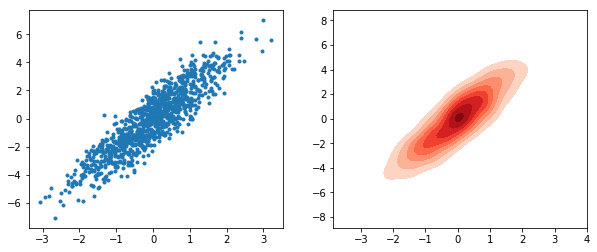

In [8]:
import matplotlib.pyplot as plt
import seaborn
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(X[:, 0], Y, '.')
seaborn.kdeplot(X[:, 0], Y, cmap="Reds", shade=True, shade_lowest=False, ax=ax[1])

## Evolution de R2

Dans la régression précédente, le coefficient $R^2$ transcrit en quelque sorte la part du bruit $\epsilon$ par rapport au terme $\alpha X_1$. Faisons varier $\alpha$.

In [9]:
alphas = []
r2s = []
for a in [0.1 * i for i in range(0, 50)]:
    Y = a*X[:,0] + X[:, 2]
    model = OLS(Y,X[:, :2])
    results = model.fit()
    alphas.append(a)
    r2s.append(results.rsquared)

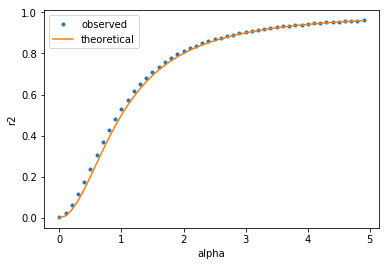

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(alphas, r2s, '.', label="observed")
ax.plot(alphas, [a**2/(1+a**2) for a in alphas], label='theoretical')
ax.set_xlabel("alpha")
ax.set_ylabel("r2")
ax.legend()

Dans ce cas de régression simple, la valeur à prédire est $y_i$, la valeur prédite est $\hat{y_i}=\alpha X_{1i}$ et la moyenne $\bar{y} = \alpha \bar{X_1} + \bar{\epsilon} = 0$.

$$R^2 = 1 - \frac{\sum_{i=1}^n (\hat{y_i}-\bar{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}=1-\frac{\mathbb{V}\epsilon}{\alpha^2\mathbb{V}X_1+\mathbb{V}\epsilon} = 1 - \frac{1}{1+\alpha^2}=\frac{\alpha^2}{1+\alpha^2}$$

## Deux variables corrélées

On ne change pas le modèle mais on fait en sorte que $X_2=X_1$. Les deux variables sont corrélées.

In [11]:
X[:, 1] = X[:, 0]
Y = 2*X[:,0] + X[:, 2]
model = OLS(Y,X[:, :2])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     4271.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:06:03   Log-Likelihood:                -1411.2
No. Observations:                1000   AIC:                             2824.
Df Residuals:                     999   BIC:                             2829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0288      0.016     65.349      0.000       0.998       1.060
x2             1.0288      0.016     65.349      0.000       0.998       1.060
==============================================================================
Omnibus:                        8.165   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.024
Skew:                          -0.064   Prob(JB):                       0.0492
Kurtosis:                       2.642   Cond. No.                     1.61e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.69e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
model.rank

1

Les variables corrélées n'ont pas l'air de déranger l'algorithme de résolution car il utilise la méthode [SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition) pour résoudre le même problème dans un espace de moindre dimension. Le problème survient que les deux variables ne sont pas complétement corrélées. On étudie le modèle $Y \sim X_1 + X'_2$ avec $X'_2 = \alpha X_1 + (1-\alpha) X_2$ et on réduit la variance du bruit pour en diminuer les effets.

In [13]:
X_ = npr.normal(size=(1000, 3))

In [14]:
alphas = [0.9 + i * 0.01 for i in range(0,11)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1-a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + 0.1 * X[:, 2]
    model = OLS(Y,X[:, :2])
    results = model.fit()
    res.append(dict(alpha=a, r2=results.rsquared, rank=model.rank, c1=results.params[0], c2=results.params[1]))
    
import pandas
df = pandas.DataFrame(res)
df = df.set_index('alpha')
df

,c1,c2,r2,rank
alpha,,,,
0.90,1.038013,0.960807,0.997230,2
0.91,1.042368,0.956452,0.997258,2
0.92,1.047811,0.951009,0.997284,2
0.93,1.054810,0.944010,0.997311,2
0.94,1.064142,0.934678,0.997338,2
0.95,1.077206,0.921614,0.997364,2
0.96,1.096803,0.902017,0.997390,2
0.97,1.129463,0.869356,0.997416,2
0.98,1.194785,0.804034,0.997441,2


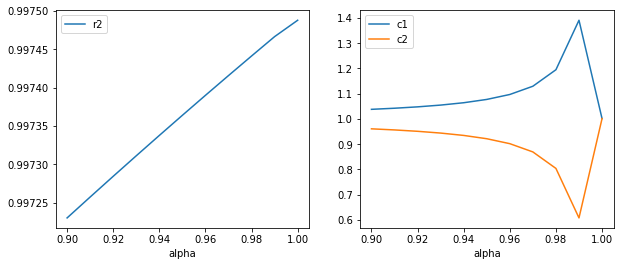

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df[["r2"]].plot(ax=ax[0])
df[["c1", "c2"]].plot(ax=ax[1])

Paradoxalement, le $r^2$ augmente quand la corrélation augmente mais les coefficients sont moins fiables. Les résultats devraient être sensiblement identiques en théorie mais en pratique, plus le déterminant devient proche de zéro, plus l'ordinateur est limité par sa précision numérique. Pour en savoir plus, vous pouvez lire un examen écrit que j'ai rédigé, en python bien sûr : [Examen Programmation ENSAE première année
2006](http://www.xavierdupre.fr/site2013/enseignements/tdnote/ecrit_2006.pdf). Cette précision est aux alentours de $10^{-15}$ ce qui correspond à la précision numérique des [double](https://en.wikipedia.org/wiki/Double-precision_floating-point_format).

In [16]:
alphas = [1 - 10**(-i) for i in range(10,18)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1-a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = OLS(Y,X[:, :2])
    results = model.fit()
    res.append(dict(alpha_1=a-1, r2=results.rsquared, rank=model.rank, c1=results.params[0], c2=results.params[1]))
    
import pandas
df = pandas.DataFrame(res)
df = df.set_index('alpha_1')
df

,c1,c2,r2,rank
alpha_1,,,,
-1.000000e-10,3.919317e+08,-3.919317e+08,0.802966,2
-1.000000e-11,3.919327e+09,-3.919327e+09,0.802966,2
-9.999779e-13,3.919546e+10,-3.919546e+10,0.802966,2
-1.000311e-13,3.919980e+11,-3.919980e+11,0.802967,2
-9.992007e-15,3.929459e+12,-3.929459e+12,0.802972,2
-9.992007e-16,1.013562e+00,1.013562e+00,0.802678,2
-1.110223e-16,1.013562e+00,1.013562e+00,0.802678,1
0.000000e+00,1.013562e+00,1.013562e+00,0.802678,1


On fait un dernier test avec [scikit-learn](http://scikit-learn.org/stable/) pour vérifier que l'algorithme de résolution donne des résultats similaires pour un cas où le déterminant est quasi-nul.

In [17]:
from sklearn.linear_model import LinearRegression

alphas = [0.9 + i * 0.01 for i in range(0,11)]
res = []
for a in alphas:
    X = X_.copy()
    X[:, 1] = a * X[:, 0] + (1-a) * X[:, 1]
    Y = X[:, 0] + X[:, 1] + X[:, 2]
    model = LinearRegression()
    model.fit(X[:, :2], Y)
    res.append(dict(alpha=a, c1=model.coef_[0], c2=model.coef_[1]))
    
import pandas
df = pandas.DataFrame(res)
df = df.set_index('alpha')
df

,c1,c2
alpha,,
0.90,1.380102,0.607974
0.91,1.423660,0.564415
0.92,1.478108,0.509967
0.93,1.548113,0.439962
0.94,1.641453,0.346623
0.95,1.772128,0.215947
0.96,1.968141,0.019934
0.97,2.294830,-0.306755
0.98,2.948207,-0.960132


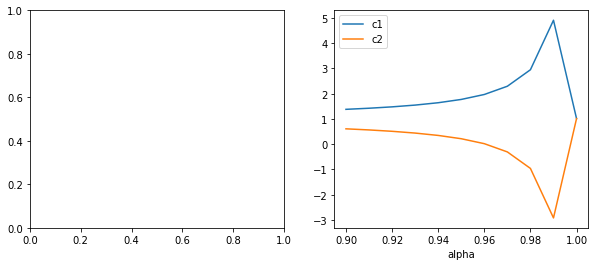

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df[["c1", "c2"]].plot(ax=ax[1])

## Indicatrices

$X_1$ est une variable aléatoire gaussienne. On teste maintenant un modèle $Y = X'_1 + X'_2 + \epsilon$ avec $X'_1 = X_1 \mathbb{1}_{X_1 < 0}$ et $X'_2 = X_1 \mathbb{1}_{X_1 \geqslant 0}$.

In [19]:
X_ = npr.normal(size=(1000, 3))
X = X_.copy()
X[:, 1] = X[:, 0]
X[X_[:, 0] >= 0, 0] = 0
X[X_[:, 1] < 0, 0] = 0
Y = X[:, 0] + X[:, 1] + X[:, 2]
corrcoef(X.T)

array([[  1.00000000e+00,   5.34836040e-01,   2.09144531e-04],
       [  5.34836040e-01,   1.00000000e+00,   2.14870545e-02],
       [  2.09144531e-04,   2.14870545e-02,   1.00000000e+00]])

In [20]:
model = OLS(Y,X[:, :3])
results = model.fit()
results.summary()

c:\python36_x64\lib\site-packages\statsmodels\regression\linear_model.py:1432: RuntimeWarning: divide by zero encountered in double_scalars
  return self.mse_model/self.mse_resid
c:\python36_x64\lib\site-packages\statsmodels\regression\linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\python36_x64\lib\site-packages\statsmodels\stats\stattools.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
c:\python36_x64\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:51:57   Log-Likelihood:                    inf
No. Observations:                1000   AIC:                              -inf
Df Residuals:                     997   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000          0        inf      0.000       1.000       1.000
x2             1.0000          0        inf      0.000       1.000       1.000
x3             1.0000          0        inf      0.000       1.000       1.000
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                     nan
Prob(Omnibus):                  0.605   Jarque-Bera (JB):              375.000
Skew:                           0.000   Prob(JB):                     3.71e-82
Kurtosis:                       0.000   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On découpe en trois.

In [21]:
import numpy
X = numpy.zeros((X_.shape[0], 4))
for i in range(0, 4):
    X[:, i] = X_[:, 0]
X[:, 3] = X_[:, 2]
X[X_[:, 0] > -1, 0] = 0 
X[(X_[:, 0] < -1) | (X_[:, 0] > 1), 1] = 0 
X[X_[:, 0] < 1, 2] = 0 
corrcoef(X.T)

array([[ 1.        , -0.0074758 ,  0.15748455,  0.0482949 ],
       [-0.0074758 ,  1.        ,  0.00733666, -0.01876802],
       [ 0.15748455,  0.00733666,  1.        , -0.03247997],
       [ 0.0482949 , -0.01876802, -0.03247997,  1.        ]])

In [22]:
model = OLS(Y,X[:, :3])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     462.1
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          4.15e-188
Time:                        13:51:26   Log-Likelihood:                -1484.1
No. Observations:                1000   AIC:                             2974.
Df Residuals:                     997   BIC:                             2989.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5377      0.054     28.715      0.000       1.433       1.643
x2             1.2156      0.076     15.909      0.000       1.066       1.366
x3             0.9548      0.054     17.566      0.000       0.848       1.061
==============================================================================
Omnibus:                        0.300   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.382
Skew:                          -0.026   Prob(JB):                        0.826
Kurtosis:                       2.920   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ca ne change pas grand chose.

## Régression linéaire par morceaux

On se place dans un cas particulier où le problème est linéaire par morceaux :

$$Y = -2 X_1 \mathbb{1}_{X_1 + \epsilon_1 <0} + 4 X_1 \mathbb{1}_{X + \epsilon_1 > 0} + \epsilon_2$$

La régression donne de très mauvais résultat sur ce type de problèmes mais on cherche une façon systématique de découper le problème en segments linéaires.

In [23]:
X = npr.normal(size=(1000,4))
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = numpy.zeros(X.shape[0])
switch[t] = 1
Y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1-t) + X[:, 2]

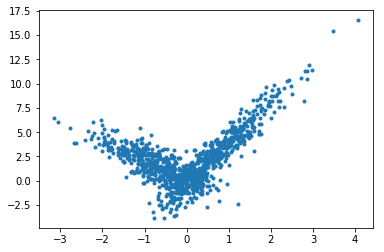

In [24]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".")

In [25]:
model = OLS(Y,X[:, :1])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           4.93e-30
Time:                        14:00:21   Log-Likelihood:                -2569.6
No. Observations:                1000   AIC:                             5141.
Df Residuals:                     999   BIC:                             5146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1703      0.099     11.768      0.000       0.975       1.365
==============================================================================
Omnibus:                       30.085   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.009
Skew:                           0.428   Prob(JB):                     1.12e-07
Kurtosis:                       3.190   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
yp = results.predict(X[:, :1])

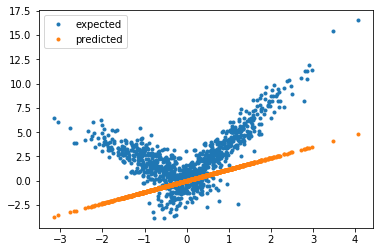

In [27]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()

Passons à un arbre de décision qui n'est pas le meilleur modèle mais on va détourner ses résultats pour revenir à un problème de régression par morceaux.

In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(min_samples_leaf=10, max_depth=3)
model.fit(X[:, :1], Y)
yp = model.predict(X[:, :1])

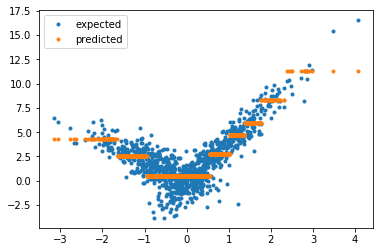

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()

c:\python36_x64\lib\site-packages\sphinx\util\compat.py:40: RemovedInSphinx17Warning: sphinx.util.compat.Directive is deprecated and will be removed in Sphinx 1.7, please use docutils' instead.
  RemovedInSphinx17Warning)


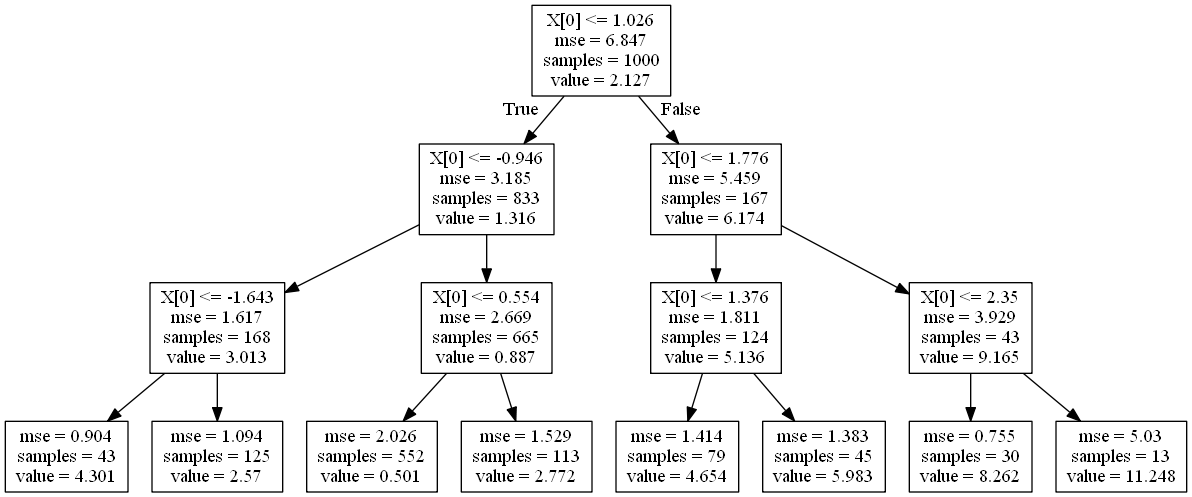

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="arbre.dot")
from pyensae.graphhelper import run_dot
run_dot("arbre.dot", "arbre.png")
from IPython.display import Image
Image("arbre.png")

On extrait tous les seuils de l'arbre et on ajoute les milieux de segments.

In [31]:
th = list(sorted(set(model.tree_.threshold)))
th += [(th[i] + th[i-1])/2 for i in range(1,len(th))]
th = list(sorted(th))
th

[-2.0,
 -1.8213835954666138,
 -1.6427671909332275,
 -1.2944687008857727,
 -0.94617021083831787,
 -0.19603323936462402,
 0.55410373210906982,
 0.79026675224304199,
 1.0264297723770142,
 1.2013808488845825,
 1.3763319253921509,
 1.5761525630950928,
 1.7759732007980347,
 2.0631749033927917,
 2.3503766059875488]

On fait une régression sur les variables $W_{i>0} = X_1 \mathbb{1}_{X_1 > t_i}$, $W_0 = X_1$ où les $(t_i)$ sont les seuils.

In [32]:
W = numpy.zeros((X.shape[0], len(th)+1))
x = X[:, 0]
W[:, 0] = x
for i in range(len(th)):
    W[x > th[i], i+1] = x[x > th[i]]

In [33]:
model = OLS(Y,W)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     399.9
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:21:16   Log-Likelihood:                -1626.9
No. Observations:                1000   AIC:                             3286.
Df Residuals:                     984   BIC:                             3364.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0108      0.123    -16.372      0.000      -2.252      -1.770
x2            -0.0258      0.208     -0.124      0.901      -0.434       0.382
x3            -0.2698      0.280     -0.963      0.336      -0.819       0.280
x4             0.3945      0.257      1.534      0.125      -0.110       0.899
x5            -0.3092      0.178     -1.735      0.083      -0.659       0.041
x6             0.8607      0.185      4.660      0.000       0.498       1.223
x7             3.7392      0.310     12.063      0.000       3.131       4.347
x8             1.2589      0.353      3.565      0.000       0.566       1.952
x9            -0.0214      0.303     -0.070      0.944      -0.617       0.574
x10            0.5161      0.274      1.882      0.060      -0.022       1.054
x11           -0.4684      0.234     -2.002      0.046      -0.927      -0.009
x12            0.2202      0.232      0.948      0.343      -0.235       0.676
x13           -0.1728      0.235     -0.736      0.462      -0.633       0.288
x14            0.4970      0.219      2.267      0.024       0.067       0.927
x15           -0.2860      0.227     -1.262      0.207      -0.731       0.159
x16            0.0125      0.209      0.060      0.952      -0.397       0.422
==============================================================================
Omnibus:                      109.416   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.805
Skew:                          -0.687   Prob(JB):                     4.56e-46
Kurtosis:                       4.767   Cond. No.                         30.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dessinons les résultats de la prédictions.

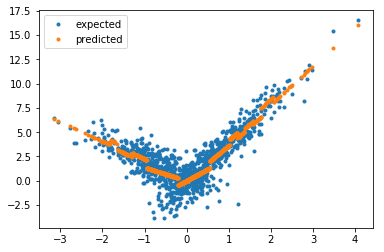

In [34]:
yp = results.predict(W)
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()

Le modèle nous suggère de ne garder que quelques seuils. En s'appuyant sur les p-values :

In [35]:
keep = numpy.arange(len(results.pvalues))[results.pvalues < 0.05]
keep

array([ 0,  5,  6,  7, 10, 13])

In [36]:
W2 = W[:, keep]

In [37]:
model = OLS(Y,W2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1061.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:21:28   Log-Likelihood:                -1633.3
No. Observations:                1000   AIC:                             3279.
Df Residuals:                     994   BIC:                             3308.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0659      0.064    -32.467      0.000      -2.191      -1.941
x2             0.7055      0.149      4.734      0.000       0.413       0.998
x3             3.7392      0.310     12.047      0.000       3.130       4.348
x4             1.4684      0.302      4.862      0.000       0.876       2.061
x5            -0.0999      0.148     -0.675      0.500      -0.390       0.191
x6             0.2674      0.125      2.145      0.032       0.023       0.512
==============================================================================
Omnibus:                      112.930   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.635
Skew:                          -0.698   Prob(JB):                     1.23e-48
Kurtosis:                       4.829   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

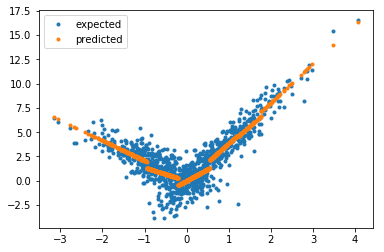

In [38]:
yp = results.predict(W2)
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], Y, ".", label="expected")
ax.plot(X[:, 0], yp, ".", label="predicted")
ax.legend()

.